# 예제와 Python 코드로 공부하는 베이즈 통계학

> 
> 당신이 어떤 암을 진단하는 대학병원 의사라고 해봅시다.
> 어느 날, 한 환자가 찾아왔고 그 환자가 당신에게 암 진찰을 부탁합니다.
> 당신이 진찰을 했더니 불행히도 환자는 암에 대해 양성 반응을 보였습니다.
> 환자는 아무리 당신이 대학병원 의사라 해도 당장 그 현실을 믿지 못할 것입니다.
> 그래서 그 환자는 당신의 진찰 결과에 대한 신뢰도를 '계산'하고자 합니다.
> 이것을 어떻게 계산할 수 있을까요?
>  

위 예제는 베이즈 통계학을 처음 공부할 때 제시되곤 하는 대표적인 예제입니다.
베이즈 통계학은 위와 같은 문제를 연구하고 해결하는 방법을 제시합니다.
특히, 위 문제가 보여주듯 베이즈 통계학은 굉장히 현실적인 문제에 응용될 수 있으며 특유의 철학 때문에 머신러닝에도 자주 응용됩니다.
그러므로 베이즈 통계학을 공부해두면 굉장히 많은 분야에서 유용하게 사용할 수 있을 것입니다.

베이즈 통계학은 확률의 개념을 어떤 주장에 대한 타당성 혹은 신뢰도의 개념으로 이해합니다.
특히, 베이즈 통계학의 핵심 이론인 베이즈 정리는 이 신뢰도라는 개념이 새로운 증거나 데이터가 얻어졌을 때 어느 정도 변하는지를 보여줍니다.
베이즈 정리는 다음과 같습니다.

> 
> ***Theorem ) Bayes Theorem***
> 
> 사건 $A$와 사건 $B$에 대하여, $P(B)>0$이라고 할 때, 조건부확률 $P(A|B)$는 다음과 같이 계산할 수 있다.
> $$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

베이즈 정리의 의미를 해석하고자 하면 사건을 주장으로, 확률을 그 주장의 타당성으로 이해하면 좋습니다.
이러한 생각에 따르면, 베이즈 정리 공식에 들어있는 각 확률들은 다음과 같이 해석될 수 있습니다.
- $P(A|B), P(B|A)$ : $B$ (또는 $A$)라는 주장이 참일 때, $A$(또는 $B$)라는 주장의 타당성.
- $P(A), P(B)$ : 주장 $A$ (또는 $B$)의 타당성.

그러므로, 베이즈 정리는 $B$라는 주장이 참이라는 것을 알게됨으로 인해 주장 $A$의 타당성 $P(A)$가 어떻게 변하는지를 보여주며, 그 값은 주장 $P(A)$의 타당성에 $P(B|A)/P(B)$를 곱한 값으로 계산됨을 보여줍니다.

이때, 조건부에 해당하는 주장 $B$는 데이터 또는 증거로 해석되기도 합니다.
처음 예시에서 환자가 암에 걸렸다는 주장이 $A$라고 하고 의사의 진찰이 양성이라는 주장이 $B$라고 합시다.
그러면 의사의 진찰 정보 $B$는 환자가 암에 걸렸다는 주장에 대한 새로운 데이터 또는 증거가 됩니다.
그러므로 우리는 위 예제에서 알고싶었던 '의사가 암 진찰결과 양성이라고 했을 때, 그 진찰결과에 대한 신뢰도'는 $P(A|B)$로 표현될 수 있고 이 신뢰도는 베이즈 정리에 의해 해결될 수 있음을 알 수 있습니다.

베이즈 정리를 이용해 $P(A|B)$를 계산하고자 하면, $P(B|A)$, $P(A)$, $P(B)$ 세 가지의 값을 알아야 합니다.
베이즈 정리가 유용한 이유는 위 세 값을 알아내는 것이 일반적으로 $P(A|B)$를 아는 것보다 쉽기 때문입니다.
그렇지 않다면 하나를 알기 위해 셋을 알아야 하는 베이즈 정리를 쓸 이유가 없겠지요.

베이즈 정리는 $P(A|B)$라는 주장의 타당성을 얻기 위해 내가 어떤 정보를 연구하고 조사해야하는지 교훈을 줍니다.
$P(B|A), P(A), P(B)$ 이 세 값들은 $P(A|B)$에 비해 연구나 조사를 통해 알기 쉽습니다.

위 예시로 이해해봅시다.
$P(A)$는 아무런 데이터가 주어지지 않은 상황에서 이 환자가 암환자라고 믿을 신뢰도의 양이라고 할 수 있습니다.
이 신뢰도는 '전체 인구 중 암환자의 비율'로 생각해도 좋을 것입니다. 
따라서 의사는 암환자에 대한 통계자료를 참고하여 $P(A)$의 값으로 사용할 것입니다.
이때, $P(A)$는 어떤 증거를 얻기 전 믿고있었던 신뢰도라는 의미에서 **사전확률**(Prior)이라 부릅니다.

$P(B|A)$는 암환자에 대해 의사의 양성진단이 타당할 신뢰도의 양이라고 할 수 있습니다.
의사가 사용하는 진단방법의 개발자는 실제 암환자들을 대상으로 진단을 수행하고 그 성공률을 측정해두고 논문에 수록했을 것입니다.
따라서 의사는 이 값을 논문에서 참고하여 $P(B|A)$의 값으로 사용할 것입니다.
이때, $P(B|A)$는 $A$라는 주장이 참이라고 가정했을 때, $B$라는 증거가 참일 확률 혹은 $B$라는 데이터를 얻을 가능성이라는 의미에서 **가능도**(Likelihood)라고 부릅니다.

$P(B)$는 $P(B|A)P(A) + P(B|A^c)P(A^c)$로 계산할 수 있습니다.
이때, $P(B|A^c)$는 마찬가지로 진단방법의 개발자가 암환자가 아닌 사람들을 대상으로 진단을 수행하여 양성이 보인, 즉 오진률을 측정해두고 논문에 수록했을 것이므로 여기서 얻을 수 있습니다.
따라서 지금까지 얻은 정보들로부터 $P(B)$를 계산할 수 있게 됩니다.



In [1]:
from bayes_theorem import bayes_theorem

'''
Problem : Let A be the event which a randomly chosen paitent has a cancer, and B be the event which a doctor detect the cancer.
Find P(A|B).
'''

# Given informations
p_a = 0.0002        # The cancer rate in the population
p_b_given_a = 0.85
p_b_given_not_a = 0.05

# Result
p_a_given_b = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)

print('P(A|B) = ', p_a_given_b)


P(A|B) =  0.0033891547049441782


In [2]:
p_pos_in_d = 0.99
p_d = 0.002
p_pos_in_not_d = 0.05

p_d_in_pos = bayes_theorem(p_a = p_d, p_b_given_a= p_pos_in_d, p_b_given_not_a= 0.05)
print(p_d_in_pos)

0.038164996144949885


Suppose we have 2 buckets A and B. 
In bucket A we have 30 blue balls and 10 yellow balls, while in bucket B we have 20 blue and 20 yellow balls. 
We are required to choose one ball. 
What is the chance that we choose bucket A?

In [3]:
import numpy as np
import pandas as pd

hypos = 'bucket A', 'bucket B'      # 
probs = 1/2, 1/2
prior = pd.Series(probs, hypos)     # pmf of 
prior

bucket A    0.5
bucket B    0.5
dtype: float64

In [4]:
prob_blue_in_A = 3/4
prob_blue_in_B = 1/2

likelihood = 3/4, 1/2

numerator = likelihood * prior
numerator

bucket A    0.375
bucket B    0.250
dtype: float64

In [5]:
denominator = numerator.sum()
denominator

0.625

In [6]:
posterior = numerator / denominator
posterior

bucket A    0.6
bucket B    0.4
dtype: float64

In [7]:
print(bayes_theorem(p_a = 1/2, p_b_given_a = 3/4, p_b_given_not_a = 1/2))

0.6


Now suppose a similar situation as given in the above problem, putting back the previous lifted block and choosing a ball from the similar bucket and it is a yellow ball. Now, what is the probability that both times we chose bucket A to pick the ball?

In [8]:
prior = posterior
print(prior)

bucket A    0.6
bucket B    0.4
dtype: float64


In [9]:
likelihood = 1/4, 1/2

In [10]:
from bayes_theorem import bayes_theorem_pmf
posterior = bayes_theorem_pmf(prior = prior, likelihood = likelihood)
posterior

bucket A    0.428571
bucket B    0.571429
dtype: float64

In [11]:
print(bayes_theorem(p_a = 0.6, p_b_given_a = 1/4, p_b_given_not_a = 1/2))

0.4285714285714286


Let’s increase the complexity of the problem this time we have 101 buckets and the distribution of the balls are like below given points :

- Bucket 0 has the 0 blue balls 
- Bucket 1 has 1% blue balls
- Bucket 2 has 2% blue balls
 And so on  up to 
- Bucket 99 has 99% blue balls
- Bucket 100 has 100% blue balls.
- 
In the previous example, we had only two types of buckets.
Now in this problem, we have 100% yellow balls in bucket 0 and 99% yellow balls in bucket 1 and so on.

Now suppose we randomly choose a bucket and pick a ball and it turns out to be blue. What is the probability that the ball came from Bucket  ????, for each value of  ?????

P(바구니|파란공) = P(파란공|바구니)*P(바구니)/P(파란공)

In [12]:
X = np.linspace(0,100, num = 101)                     # Random variable for bucket
prob = 1/len(X)                                       # X ~ uniform distribution
prior = pd.Series(prob,X)
prior

0.0      0.009901
1.0      0.009901
2.0      0.009901
3.0      0.009901
4.0      0.009901
           ...   
96.0     0.009901
97.0     0.009901
98.0     0.009901
99.0     0.009901
100.0    0.009901
Length: 101, dtype: float64

In [13]:
likelihood = np.linspace(0,1, num = 101)
likelihood

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [14]:
posterior = bayes_theorem_pmf(prior = prior, likelihood = likelihood)
posterior

0.0      0.000000
1.0      0.000198
2.0      0.000396
3.0      0.000594
4.0      0.000792
           ...   
96.0     0.019010
97.0     0.019208
98.0     0.019406
99.0     0.019604
100.0    0.019802
Length: 101, dtype: float64

In [15]:
import matplotlib.pyplot as plt


<AxesSubplot: >

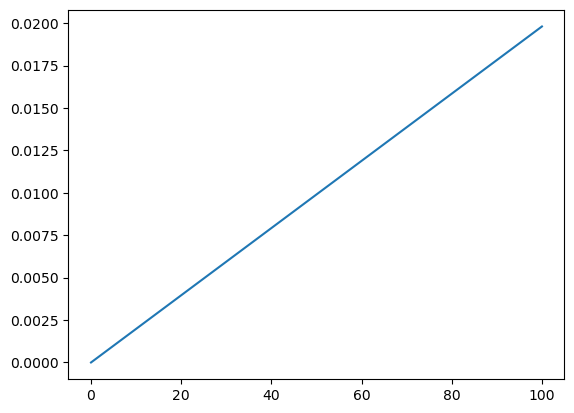

In [16]:
posterior.plot()

Let’s do the same thing again, put the ball back and pick the ball from the same bucket and get a blue ball now. What will be the posterior?

Here again, we can say the posterior from the above problem will the prior in the below procedure:

In [17]:
prior = posterior
likelihood = likelihood
posterior = bayes_theorem_pmf(prior = prior, likelihood = likelihood)
posterior

0.0      0.000000
1.0      0.000003
2.0      0.000012
3.0      0.000027
4.0      0.000047
           ...   
96.0     0.027238
97.0     0.027808
98.0     0.028385
99.0     0.028967
100.0    0.029555
Length: 101, dtype: float64

<AxesSubplot: >

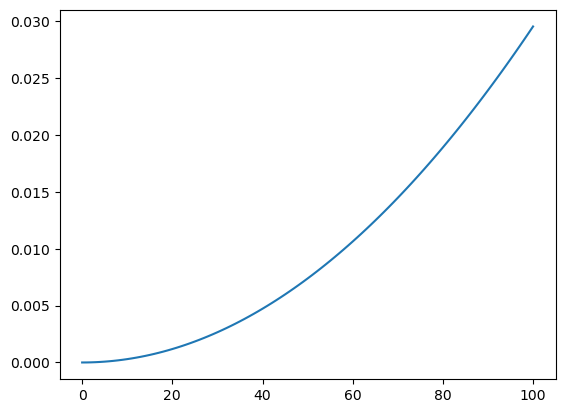

In [18]:
posterior.plot()

Now suppose we put the ball again in the bucket and again pick a ball and get a yellow ball. Now, what are the posterior probabilities?

In [19]:
prior = posterior
likelihood_yellow = 1 - likelihood
posterior = bayes_theorem_pmf(prior = prior, likelihood= likelihood_yellow)
posterior

0.0      0.000000
1.0      0.000012
2.0      0.000047
3.0      0.000105
4.0      0.000184
           ...   
96.0     0.004424
97.0     0.003388
98.0     0.002305
99.0     0.001176
100.0    0.000000
Length: 101, dtype: float64

<AxesSubplot: >

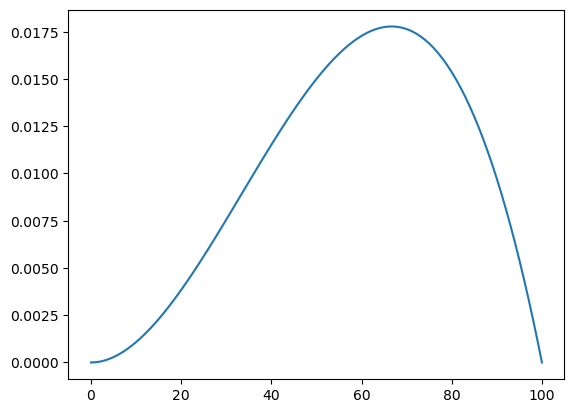

In [20]:
posterior.plot()